In [85]:
library("tidyverse")
library("ggplot2")
library("gridExtra")

ERROR: Error in library("gridExtra"): there is no package called 'gridExtra'


In [121]:
#Function that is used later to convert numbers to percents
percent <- function(x, digits = 2, format = "f", ...) {
  paste0(formatC(x * 100, format = format, digits = digits, ...), "%")
}

In [87]:
dataset = read.csv("BankChurners.csv")
dataset <- dataset[, -c(22:23)]

In [88]:
summary(dataset)

   CLIENTNUM                   Attrition_Flag  Customer_Age   Gender  
 Min.   :708082083   Attrited Customer:1627   Min.   :26.00   F:5358  
 1st Qu.:713036770   Existing Customer:8500   1st Qu.:41.00   M:4769  
 Median :717926358                            Median :46.00           
 Mean   :739177606                            Mean   :46.33           
 3rd Qu.:773143533                            3rd Qu.:52.00           
 Max.   :828343083                            Max.   :73.00           
                                                                      
 Dependent_count      Education_Level  Marital_Status       Income_Category
 Min.   :0.000   College      :1013   Divorced: 748   $120K +       : 727  
 1st Qu.:1.000   Doctorate    : 451   Married :4687   $40K - $60K   :1790  
 Median :2.000   Graduate     :3128   Single  :3943   $60K - $80K   :1402  
 Mean   :2.346   High School  :2013   Unknown : 749   $80K - $120K  :1535  
 3rd Qu.:3.000   Post-Graduate: 516                 

In [89]:
str(dataset)

'data.frame':	10127 obs. of  21 variables:
 $ CLIENTNUM               : int  768805383 818770008 713982108 769911858 709106358 713061558 810347208 818906208 710930508 719661558 ...
 $ Attrition_Flag          : Factor w/ 2 levels "Attrited Customer",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Customer_Age            : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                  : Factor w/ 2 levels "F","M": 2 1 2 1 2 2 2 2 2 2 ...
 $ Dependent_count         : int  3 5 3 4 3 2 4 0 3 2 ...
 $ Education_Level         : Factor w/ 7 levels "College","Doctorate",..: 4 3 3 4 6 3 7 4 6 3 ...
 $ Marital_Status          : Factor w/ 4 levels "Divorced","Married",..: 2 3 2 4 2 2 2 4 3 3 ...
 $ Income_Category         : Factor w/ 6 levels "$120K +","$40K - $60K",..: 3 5 4 5 3 2 1 3 3 4 ...
 $ Card_Category           : Factor w/ 4 levels "Blue","Gold",..: 1 1 1 1 1 1 2 4 1 1 ...
 $ Months_on_book          : int  39 44 36 34 21 36 46 27 36 36 ...
 $ Total_Relationship_Count: int  5 6 4 3 5 3 6 2 5 6 ...
 $ Mo

# Here we display the distribution of customers who leaves depending on their education level

In [90]:
Attrition_Flag_education <- dataset %>%
count(Education_Level,Attrition_Flag)%>%
group_by(Education_Level)%>%
mutate(p=n/sum(n)*100)

attrited_only <- Attrition_Flag_education %>%
filter(Attrition_Flag == "Attrited Customer")

attrited_only

existing_only <- Attrition_Flag_education %>%
filter(Attrition_Flag == "Existing Customer")

existing_only

Education_Level,Attrition_Flag,n,p
College,Attrited Customer,154,15.20237
Doctorate,Attrited Customer,95,21.06430
Graduate,Attrited Customer,487,15.56905
High School,Attrited Customer,306,15.20119
Post-Graduate,Attrited Customer,92,17.82946
Uneducated,Attrited Customer,237,15.93813
Unknown,Attrited Customer,256,16.85319


Education_Level,Attrition_Flag,n,p
College,Existing Customer,859,84.79763
Doctorate,Existing Customer,356,78.93570
Graduate,Existing Customer,2641,84.43095
High School,Existing Customer,1707,84.79881
Post-Graduate,Existing Customer,424,82.17054
Uneducated,Existing Customer,1250,84.06187
Unknown,Existing Customer,1263,83.14681


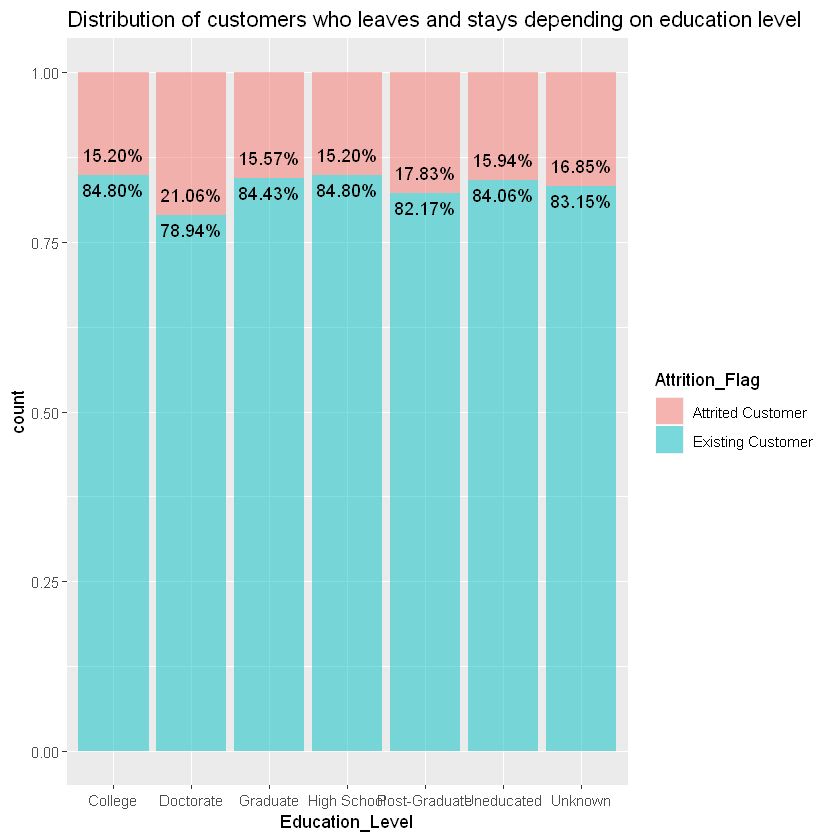

In [91]:
dataset %>%
ggplot(aes(x=Education_Level,fill=Attrition_Flag))+
geom_bar(alpha=0.5,position = "fill")+
geom_text(aes(label= percent((100-p)/100),x =Education_Level, y = (100-p)/100), data = attrited_only,
vjust = 1.5)+
geom_text(aes(label= percent((100-p)/100),x =Education_Level, y = p/100), data = existing_only,
vjust = -1)+

ggtitle("Distribution of customers who leaves and stays depending on education level")

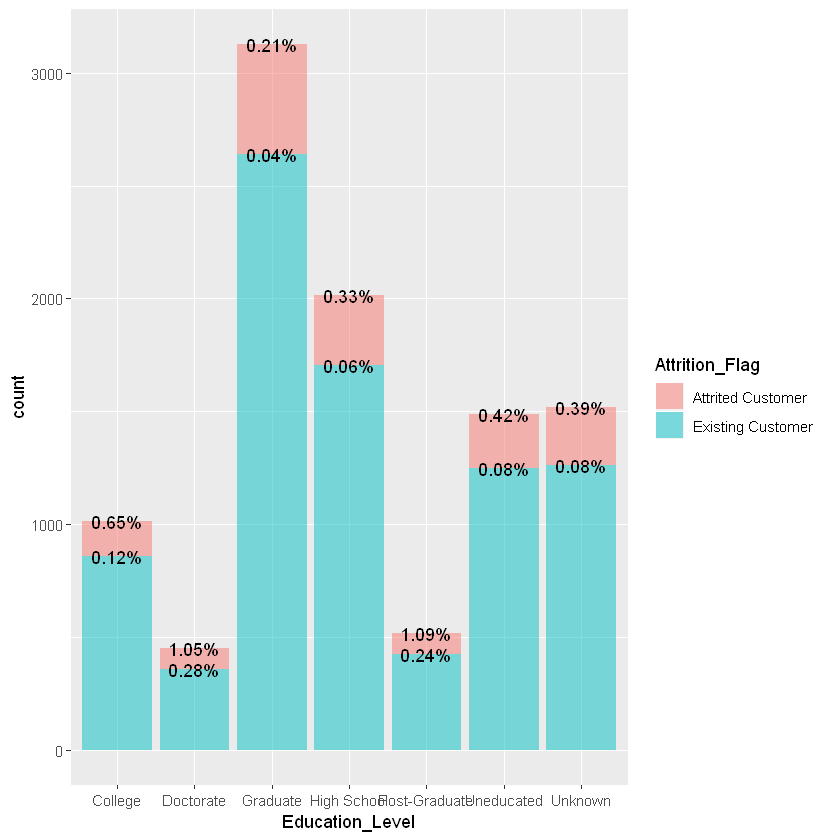

In [137]:

#Attempt at cleaner code from above graph. Doesn't work
dataset %>%
select(Education_Level,Attrition_Flag)%>%
add_count(Education_Level,Attrition_Flag)%>%
group_by(Education_Level,Attrition_Flag)%>%
mutate(p=n/sum(n)*100)%>%
ggplot(aes(x=Education_Level,fill=Attrition_Flag))+
geom_bar(alpha=0.5)+
stat_count(aes(label =percent(p/100)), geom = "text")



# The Distibution of customers leaving and the amount of inactive months

In [93]:
Attrition_Flag_And_Inactive <- select(dataset, Attrition_Flag, Months_Inactive_12_mon)

In [94]:
Attrition_Flag_And_Inactive <- dataset %>%
count(Attrition_Flag, Months_Inactive_12_mon)%>%
group_by(Months_Inactive_12_mon) %>%
mutate(p=n/sum(n))

Attrition_Flag_Attrited <- Attrition_Flag_And_Inactive %>%
filter(Attrition_Flag == "Attrited Customer")

Attrition_Flag_Existing <- Attrition_Flag_And_Inactive %>%
filter(Attrition_Flag == "Existing Customer")

Attrition_Flag_And_Months_Inactive = merge(x=Attrition_Flag_Attrited,y=Attrition_Flag_Existing,by="Months_Inactive_12_mon")

better_Attrition_Flag_And_Months_Inactive <- Attrition_Flag_And_Months_Inactive %>%
select(Months_Inactive_12_mon, p.x, p.y)

names(better_Attrition_Flag_And_Months_Inactive)[2] <- "Stays"
names(better_Attrition_Flag_And_Months_Inactive)[3] <-"Leaves"

In [95]:
better_Attrition_Flag_And_Months_Inactive

Months_Inactive_12_mon,Stays,Leaves
0,0.5172414,0.4827586
1,0.0447828,0.9552172
2,0.1538696,0.8461304
3,0.2147686,0.7852314
4,0.2988506,0.7011494
5,0.1797753,0.8202247
6,0.1532258,0.8467742


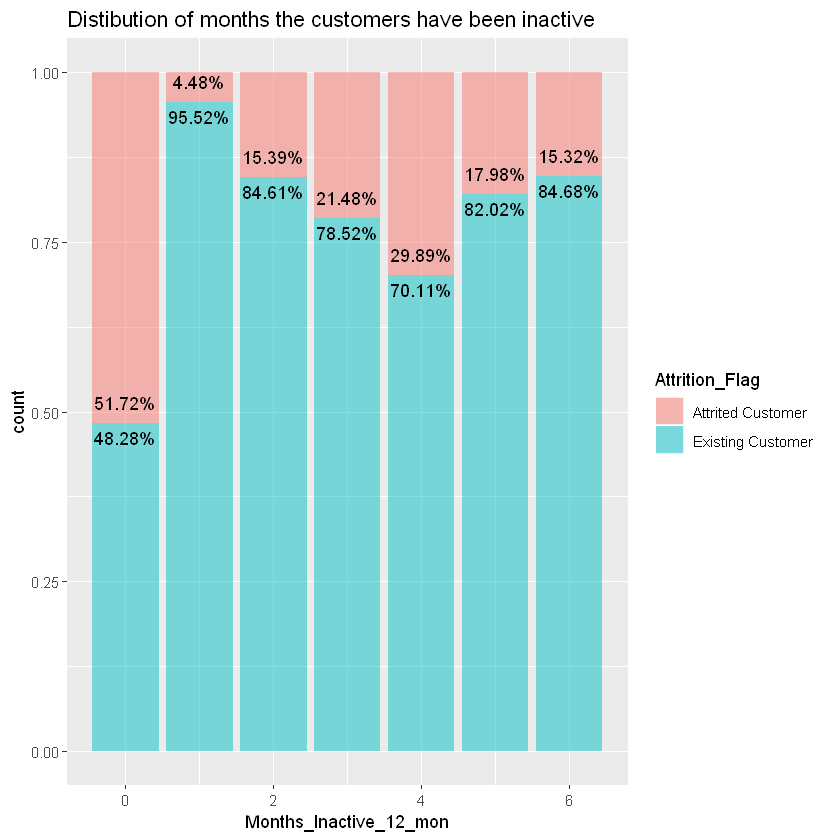

In [96]:
dataset %>%
ggplot()+
geom_bar(aes(x=Months_Inactive_12_mon,fill=Attrition_Flag), alpha=0.5,position = "fill")+
geom_text(aes(label= percent(Stays),x =Months_Inactive_12_mon, y = 1 -Stays), data = better_Attrition_Flag_And_Months_Inactive,
vjust = -1)+
geom_text(aes(label= percent(Leaves),x =Months_Inactive_12_mon, y = Leaves), data = better_Attrition_Flag_And_Months_Inactive,
vjust = 1.5)+
ggtitle("Distibution of months the customers have been inactive")

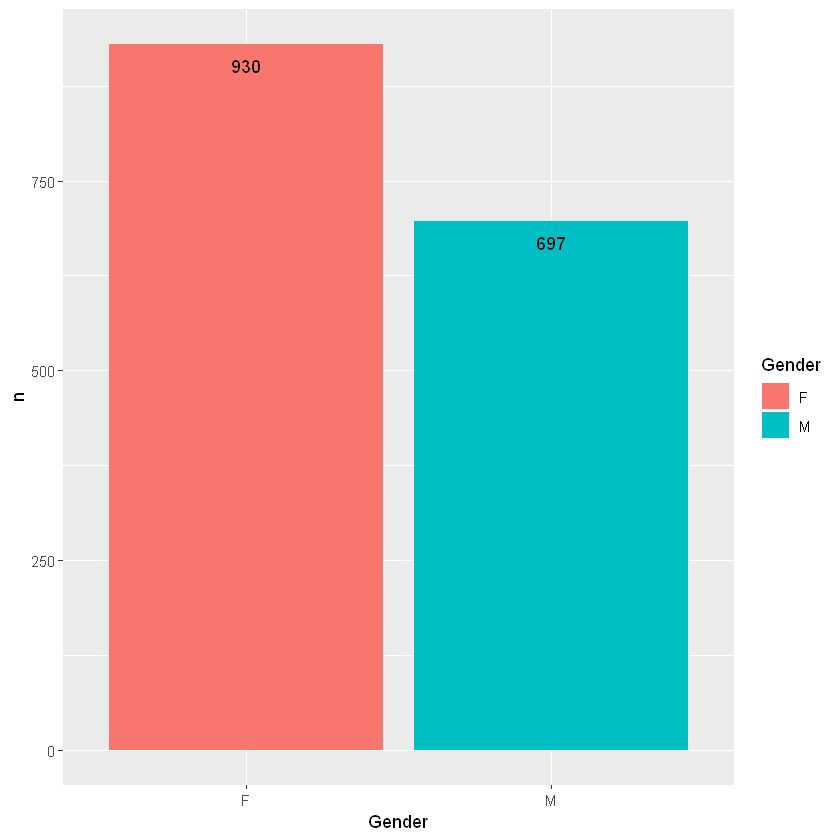

In [97]:
dataset %>%
filter(Attrition_Flag == "Attrited Customer") %>%
count(Gender) %>%
ggplot(aes(x = Gender, y = n,fill = Gender)) +
geom_col()+
geom_text(aes(label= n,vjust=2))

 # Attrited Customers by education level and income category


In [98]:
test <- dataset %>%
filter(Attrition_Flag == "Attrited Customer") %>%
count(Education_Level,Attrition_Flag, Income_Category)%>%
group_by(Education_Level)

test1 <-aggregate(n~Income_Category, test,sum)

jdf <- merge(test, test1, by = 'Income_Category') %>%
mutate(p=n.x/n.y*100)

test2 <- dataset %>%
filter(Attrition_Flag == "Existing Customer") %>%
count(Education_Level,Attrition_Flag, Income_Category)%>%
group_by(Education_Level)

test3 <-aggregate(n~Income_Category, test2,sum)

jdf1 <- merge(test2, test3, by = 'Income_Category') %>%
mutate(p=n.x/n.y*100)

In [99]:
test3

Income_Category,n
$120K +,601
$40K - $60K,1519
$60K - $80K,1213
$80K - $120K,1293
Less than $40K,2949
Unknown,925


In [100]:
jdf1

Income_Category,Education_Level,Attrition_Flag,n.x,n.y,p
$120K +,College,Existing Customer,58,601,9.650582
$120K +,High School,Existing Customer,119,601,19.800333
$120K +,Doctorate,Existing Customer,29,601,4.825291
$120K +,Post-Graduate,Existing Customer,26,601,4.326123
$120K +,Uneducated,Existing Customer,96,601,15.973378
$120K +,Unknown,Existing Customer,101,601,16.805324
$120K +,Graduate,Existing Customer,172,601,28.618968
$40K - $60K,College,Existing Customer,159,1519,10.467413
$40K - $60K,Doctorate,Existing Customer,59,1519,3.884134
$40K - $60K,Graduate,Existing Customer,476,1519,31.336406


Heatmaps for income category and education level

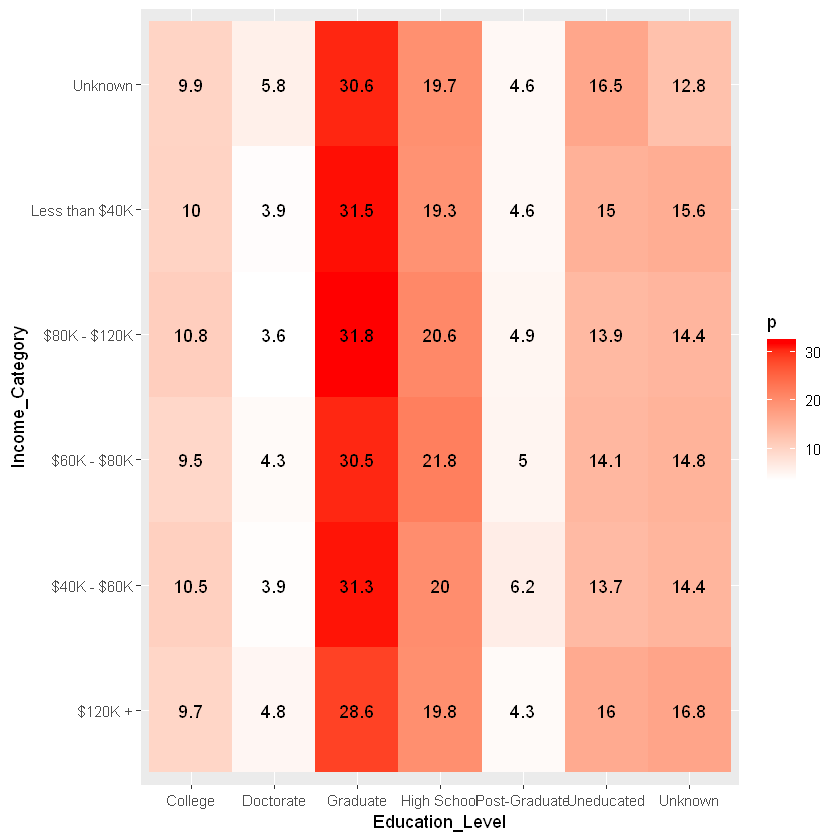

In [122]:
ggplot(jdf1, aes(x = Education_Level, y = Income_Category, fill = p)) +
  geom_tile() +
geom_text(aes(label = round(p, 1))) +
scale_fill_gradient(low = "white", high = "red") 

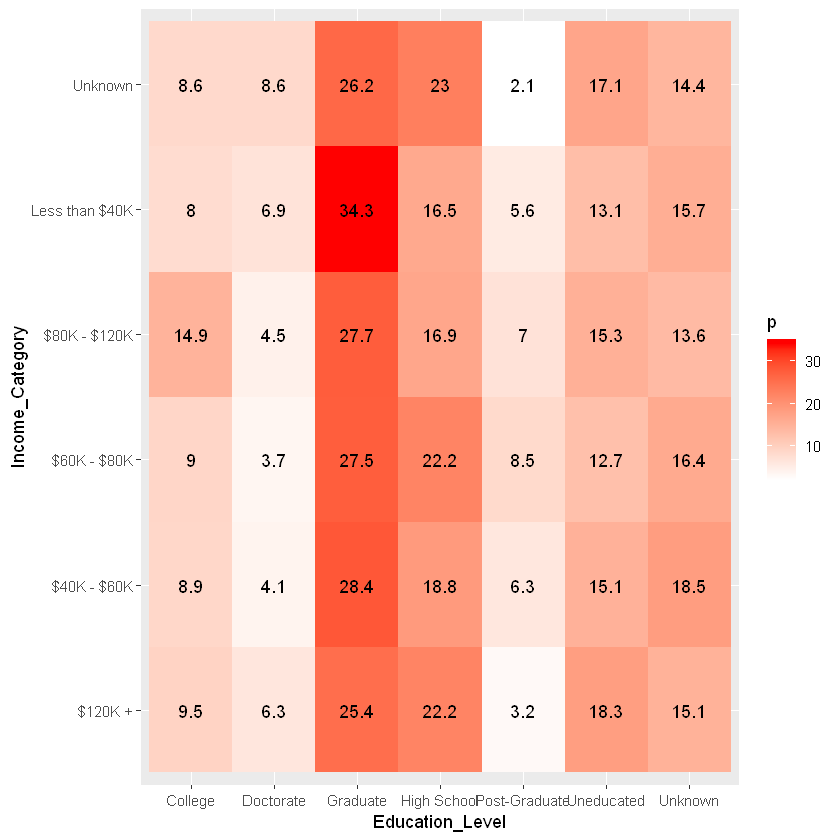

In [102]:
ggplot(jdf, aes(x = Education_Level, y = Income_Category, fill = p)) +
  geom_tile() +
geom_text(aes(label = round(p, 1))) +
scale_fill_gradient(low = "white", high = "red") 

# Credit limit for customers

In [123]:
#mean value of credit limit for existing customers
mean(dataset[dataset$Attrition_Flag == 'Existing Customer','Credit_Limit'])

[1] 8726.878

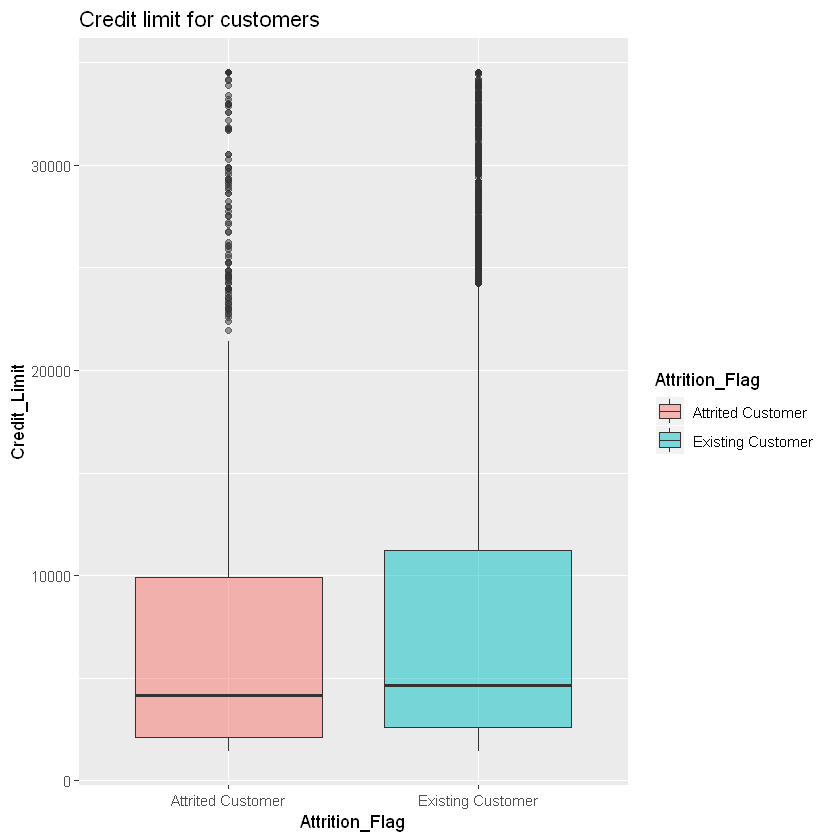

In [113]:
dataset%>%
#filter(Attrition_Flag)%>%
#ggplot(aes(x=Attrition_Flag,y=Credit_Limit,col=Attrition_Flag))+
ggplot(aes(x=Attrition_Flag,y=Credit_Limit,fill=Attrition_Flag))+
geom_boxplot(alpha=0.5)+
ggtitle("Credit limit for customers")


Correlation between credit limit and months inactive

In [135]:
cor.test(dataset$Credit_Limit, dataset$Months_Inactive_12_mon)



	Pearson's product-moment correlation

data:  dataset$Credit_Limit and dataset$Months_Inactive_12_mon
t = -2.0525, df = 10125, p-value = 0.04015
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0398547382 -0.0009173786
sample estimates:
        cor 
-0.02039379 


# Distribution of gender

In [105]:
df1 <-dataset %>%
filter(Attrition_Flag== "Attrited Customer"|Attrition_Flag== "Existing Customer")%>%
count(Attrition_Flag,Gender)%>%
group_by(Gender) %>%
mutate(total=sum(n)) %>%
mutate(p = (n/total))
df1$Gender_Distribution <- c("FA","MA","FE","ME")

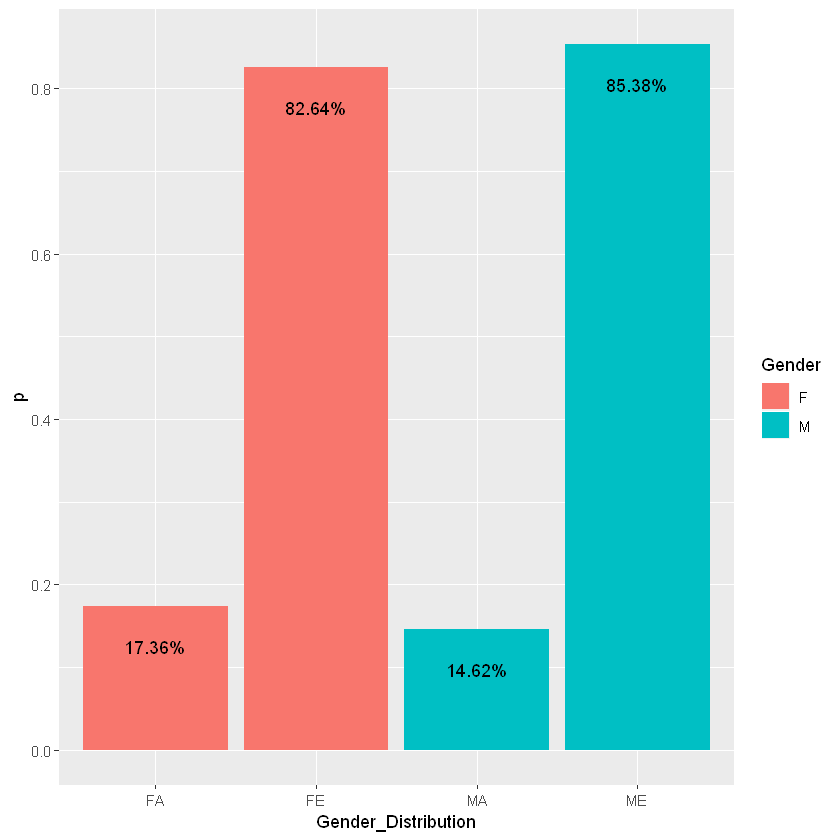

In [106]:
df1 %>% ggplot(aes(x = Gender_Distribution, y = p,fill = Gender)) +
geom_col()+
geom_text(aes(label = percent(p)), vjust =3.37 )

In [107]:
df1

Attrition_Flag,Gender,n,total,p,Gender_Distribution
Attrited Customer,F,930,5358,0.1735722,FA
Attrited Customer,M,697,4769,0.1461522,MA
Existing Customer,F,4428,5358,0.8264278,FE
Existing Customer,M,4072,4769,0.8538478,ME


# Marital status (WIP)

In [108]:
aaa <- dataset%>%
count(Marital_Status)%>%
ggplot(aes(x= Marital_Status, y = n,fill = Marital_Status))+
geom_col()+
geom_text(aes(label = n), vjust =3.37 )+
theme(legend.position="none")

In [109]:
bbb <- dataset %>%
filter(Attrition_Flag == "Attrited Customer")%>%
count(Marital_Status)%>%
ggplot(aes(x= Marital_Status, y = n,fill = Marital_Status))+
geom_col()+
geom_text(aes(label = n), vjust =3.37 )

In [110]:
grid.arrange(aaa, bbb, nrow = 1)


ERROR: Error in grid.arrange(aaa, bbb, nrow = 1): could not find function "grid.arrange"


In [124]:
martial_procent <- dataset %>%
filter(Attrition_Flag== "Attrited Customer"|Attrition_Flag== "Existing Customer")%>%
count(Attrition_Flag,Marital_Status)%>%
group_by(Marital_Status) %>%
mutate(total=sum(n)) %>%
mutate(p = (n/total))
#A = attrited E = existing
martial_procent$Marital_Distribution <- c("AM","AS","AU","AD","EM","ES","EU","ED")

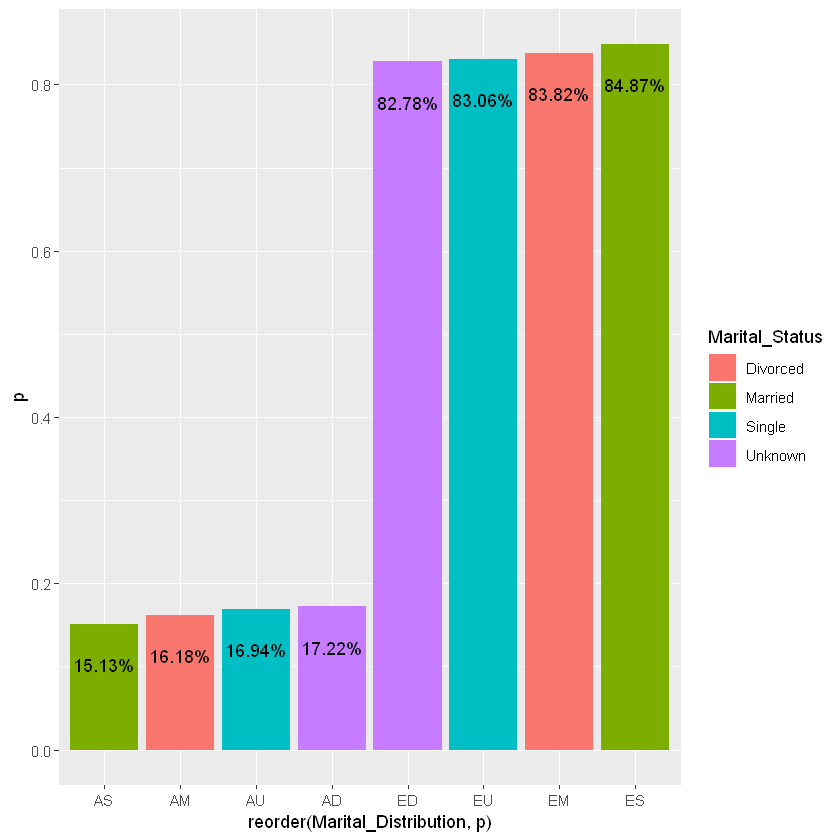

In [112]:
martial_procent %>% ggplot(aes(reorder(Marital_Distribution, p), y = p, fill = Marital_Status)) +
geom_col()+
geom_text(aes(label = percent(p)), vjust =3.37 )